### LAB 8:ANIMAL CLASSIFICATION USING DECISION TREE

In [3]:
import pandas as pd

In [4]:
#STEP 1:

In [5]:
df=pd.read_csv("animal.csv")
df.head()

,Toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal


In [6]:
#STEP 2:

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
DT=DecisionTreeClassifier(criterion='entropy')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x=df.drop("species",axis=1)
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [11]:
x

,Toothed,hair,breathes,legs
0,True,True,True,True
1,True,True,True,True
2,True,False,True,False
3,False,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,False,False,False
7,True,False,True,False
8,True,True,True,True
9,False,False,True,True


In [12]:
y

0     Mammal
1     Mammal
2    Reptile
3     Mammal
4     Mammal
5     Mammal
6    Reptile
7    Reptile
8     Mammal
9    Reptile
Name: species, dtype: object

In [13]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
y_pred=DT.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score as acs

In [16]:
acc=acs(y_test,y_pred)

In [17]:
acc

1.0

In [18]:
from sklearn.metrics import classification_report

In [19]:
cr=classification_report(y_pred,y_test)
cr

'              precision    recall  f1-score   support\n\n      Mammal       1.00      1.00      1.00         3\n     Reptile       1.00      1.00      1.00         1\n\n    accuracy                           1.00         4\n   macro avg       1.00      1.00      1.00         4\nweighted avg       1.00      1.00      1.00         4\n'

In [20]:
from sklearn.tree import export_graphviz
from sklearn import tree

In [21]:
with open("tree1.dot",'w')as f:
    f=tree.export_graphviz(DT,out_file=f,max_depth=4,impurity=False,feature_names=x.columns.values,class_names=['Reptile','Mammal'],filled=True)

In [22]:
!type tree1.dot

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="hair <= 0.5\nsamples = 6\nvalue = [3, 3]\nclass = Reptile", fillcolor="#ffffff"] ;
1 [label="samples = 3\nvalue = [0, 3]\nclass = Mammal", fillcolor="#399de5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 3\nvalue = [3, 0]\nclass = Reptile", fillcolor="#e58139"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


[Text(0.5, 0.75, 'X[1] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]')]

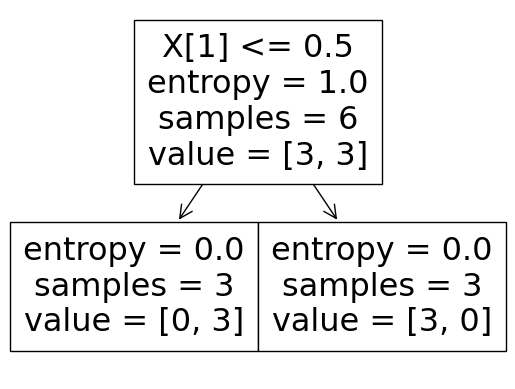

In [23]:
tree.plot_tree(DT)

In [24]:
#STEP 3:

In [25]:
test=pd.read_csv("animaltest.csv")
test

,Toothed,hair,breathes,legs
0,False,False,True,False
1,False,True,True,True
2,True,False,True,True


In [26]:
#STEP 4:

In [27]:
DT

DecisionTreeClassifier(criterion='entropy')

In [28]:
y_pred=DT.predict(test)

In [29]:
y_pred

array(['Reptile', 'Mammal', 'Reptile'], dtype=object)

In [30]:
#STEP 5:

In [31]:
DTC=DecisionTreeClassifier(criterion='gini')

In [32]:
DTC.fit(x,y)

DecisionTreeClassifier()

In [33]:
y_pred1=DTC.predict(test)

In [34]:
y_pred1

array(['Reptile', 'Mammal', 'Reptile'], dtype=object)

In [35]:
with open("tree2.dot",'w')as f:
    f=tree.export_graphviz(DT,out_file=f,max_depth=4,impurity=False,feature_names=x.columns.values,class_names=['Reptile','Mammal'],filled=True)

[Text(0.5, 0.75, 'X[1] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

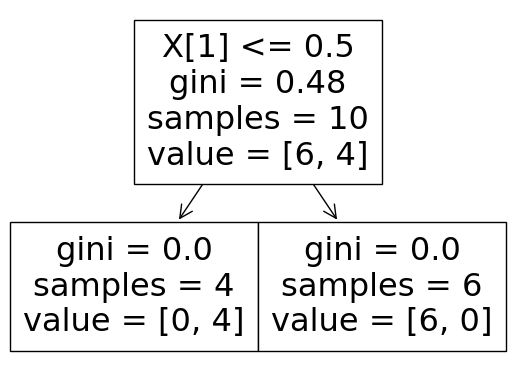

In [36]:
tree.plot_tree(DTC)

In [37]:
#STEP 6:

In [38]:
zoo=pd.read_csv("zoo.data")

In [39]:
zoo.head()

,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [40]:
X=zoo.drop(['aardvark','1.7'],axis=1)

In [41]:
y=zoo['1.7'].values

In [42]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.33,random_state=0)
zoo_entropy = DecisionTreeClassifier(criterion ="entropy")
zoo_entropy.fit(X1_train,y1_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
y1_pred = zoo_entropy.predict(X1_test)

In [44]:
train_acc=zoo_entropy.predict(X1_train)
train_acc

array([1, 5, 1, 1, 2, 1, 1, 4, 3, 2, 6, 1, 2, 4, 2, 6, 1, 4, 4, 1, 1, 1,
       6, 4, 1, 6, 7, 2, 1, 1, 2, 3, 4, 2, 7, 7, 3, 2, 6, 1, 1, 7, 1, 2,
       2, 4, 2, 5, 4, 4, 1, 6, 1, 2, 7, 5, 2, 6, 2, 1, 1, 1, 6, 1, 1, 1,
       1], dtype=int64)

In [45]:
test_acc=zoo_entropy.predict(X1_test)
test_acc

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 7, 4, 1, 2, 5, 4, 1, 1, 5,
       1, 1, 7, 1, 4, 2, 2, 7, 4, 7, 3], dtype=int64)

In [46]:
print("Train Accuracy:", acs(y1_train, zoo_entropy.predict(X1_train)))
print("Test Accuracy:", acs(y1_test, zoo_entropy.predict(X1_test)))

Train Accuracy: 1.0
Test Accuracy: 0.9090909090909091


In [47]:
acc = acs(y1_test, y1_pred)
print("Accuracy score :",acc)

Accuracy score : 0.9090909090909091


In [48]:
clf_report= classification_report(y1_test, y1_pred)
print("Classification report: ",clf_report)

Classification report:                precision    recall  f1-score   support

           1       0.88      0.93      0.90        15
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         1
           7       1.00      0.80      0.89         5

    accuracy                           0.91        33
   macro avg       0.90      0.87      0.85        33
weighted avg       0.93      0.91      0.91        33



[Text(0.5, 0.9166666666666666, 'X[2] <= 0.5\nentropy = 2.439\nsamples = 67\nvalue = [25, 14, 3, 9, 3, 8, 5]'),
 Text(0.4, 0.75, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0, 0, 0, 0, 0, 0]'),
 Text(0.6, 0.75, 'X[1] <= 0.5\nentropy = 2.37\nsamples = 42\nvalue = [0, 14, 3, 9, 3, 8, 5]'),
 Text(0.5, 0.5833333333333334, 'X[8] <= 0.5\nentropy = 2.177\nsamples = 28\nvalue = [0, 0, 3, 9, 3, 8, 5]'),
 Text(0.2, 0.4166666666666667, 'X[9] <= 0.5\nentropy = 0.961\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 8, 5]'),
 Text(0.1, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 0, 4]'),
 Text(0.3, 0.25, 'X[12] <= 3.0\nentropy = 0.503\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 8, 1]'),
 Text(0.2, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(0.4, 0.08333333333333333, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 8, 0]'),
 Text(0.8, 0.4166666666666667, 'X[11] <= 0.5\nentropy = 1.371\nsamples = 15\nvalue = [0, 0, 3, 9, 3, 0, 0]'),
 Text(0.7, 0.25, 'X[5] 

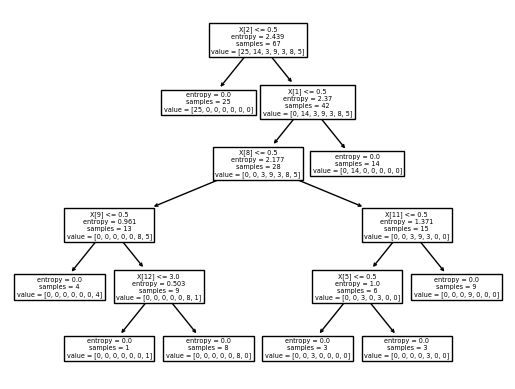

In [49]:
tree.plot_tree(zoo_entropy)

In [50]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.33,random_state=0)
zoo2_entropy = DecisionTreeClassifier(criterion ="gini")
zoo2_entropy.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [51]:
y2_pred = zoo2_entropy.predict(X2_test)

In [52]:
train_acc=zoo2_entropy.predict(X2_train)
train_acc

array([1, 5, 1, 1, 2, 1, 1, 4, 3, 2, 6, 1, 2, 4, 2, 6, 1, 4, 4, 1, 1, 1,
       6, 4, 1, 6, 7, 2, 1, 1, 2, 3, 4, 2, 7, 7, 3, 2, 6, 1, 1, 7, 1, 2,
       2, 4, 2, 5, 4, 4, 1, 6, 1, 2, 7, 5, 2, 6, 2, 1, 1, 1, 6, 1, 1, 1,
       1], dtype=int64)

In [53]:
test_acc=zoo2_entropy.predict(X2_train)
test_acc

array([1, 5, 1, 1, 2, 1, 1, 4, 3, 2, 6, 1, 2, 4, 2, 6, 1, 4, 4, 1, 1, 1,
       6, 4, 1, 6, 7, 2, 1, 1, 2, 3, 4, 2, 7, 7, 3, 2, 6, 1, 1, 7, 1, 2,
       2, 4, 2, 5, 4, 4, 1, 6, 1, 2, 7, 5, 2, 6, 2, 1, 1, 1, 6, 1, 1, 1,
       1], dtype=int64)

In [54]:
print("Train Accuracy:", acs(y2_train, zoo2_entropy.predict(X2_train)))
print("Test Accuracy:", acs(y2_test, zoo2_entropy.predict(X2_test)))

Train Accuracy: 1.0
Test Accuracy: 0.9090909090909091


In [55]:
acc = acs(y2_test, y2_pred)
print("Accuracy score :",acc)

Accuracy score : 0.9090909090909091


In [56]:
clf_report= classification_report(y2_test, y2_pred)
print("Classification report: ",clf_report)

Classification report:                precision    recall  f1-score   support

           1       0.88      0.93      0.90        15
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         4
           5       0.50      1.00      0.67         1
           7       1.00      0.80      0.89         5

    accuracy                           0.91        33
   macro avg       0.90      0.87      0.85        33
weighted avg       0.93      0.91      0.91        33



[Text(0.625, 0.9285714285714286, 'X[2] <= 0.5\ngini = 0.775\nsamples = 67\nvalue = [25, 14, 3, 9, 3, 8, 5]'),
 Text(0.5, 0.7857142857142857, 'gini = 0.0\nsamples = 25\nvalue = [25, 0, 0, 0, 0, 0, 0]'),
 Text(0.75, 0.7857142857142857, 'X[1] <= 0.5\ngini = 0.782\nsamples = 42\nvalue = [0, 14, 3, 9, 3, 8, 5]'),
 Text(0.625, 0.6428571428571429, 'X[11] <= 0.5\ngini = 0.76\nsamples = 28\nvalue = [0, 0, 3, 9, 3, 8, 5]'),
 Text(0.5, 0.5, 'X[8] <= 0.5\ngini = 0.704\nsamples = 19\nvalue = [0, 0, 3, 0, 3, 8, 5]'),
 Text(0.25, 0.35714285714285715, 'X[9] <= 0.5\ngini = 0.473\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 8, 5]'),
 Text(0.125, 0.21428571428571427, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 0, 4]'),
 Text(0.375, 0.21428571428571427, 'X[12] <= 3.0\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 8, 1]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(0.5, 0.07142857142857142, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 8, 0]')

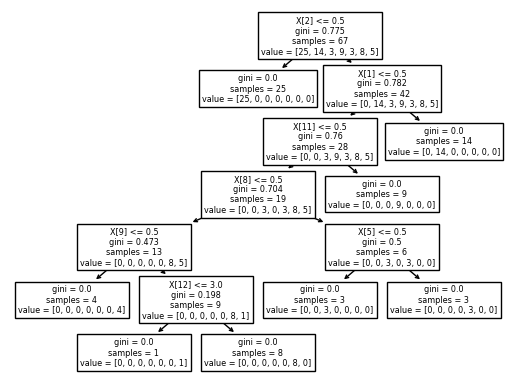

In [57]:
tree.plot_tree(zoo2_entropy)